In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import common

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.dummy
import sklearn.ensemble

In [3]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
baseline_classifier = sklearn.dummy.DummyClassifier()
baseline_classifier.fit(train_as_vec, train_targets)

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/asgavar/.local/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier(constant=None, random_state=None, strategy='warn')

SCORE: 0.20070891993683265
[[0.06096714 0.06004165 0.12220423 0.22215795 0.53462903]
 [0.06220828 0.0578937  0.11939596 0.22635811 0.53414395]
 [0.06341753 0.05907875 0.11964339 0.2268846  0.53097573]
 [0.06136673 0.06127311 0.1174904  0.22651284 0.53335691]
 [0.06070098 0.06057286 0.1185611  0.225392   0.53477306]]


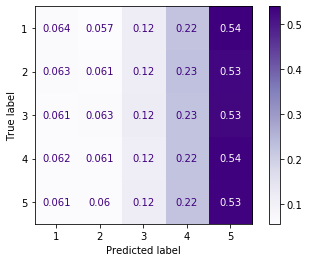

In [4]:
common.display_classifier_performance(baseline_classifier, test_as_vec, test_targets)

In [5]:
results_df = pd.DataFrame.from_dict([
    common.perf_row(
        baseline_classifier, test_as_vec, test_targets, 'baseline',
        'full', 'count', None, learning_rate='N/A', n_estimators='N/A')])
results_df

,classifier_type,sampling,representation,preprocessing,learning_rate,n_estimators,real_world_acc,score
0,baseline,full,count,None,N/A,N/A,0.358057,0.200385


In [11]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('random_downsampling', 'count', None)
classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=1)
classifier.fit(train_as_vec, train_targets)
classifier.score(test_as_vec, test_targets)

0.39705397202428083

In [9]:
classifier.score(test_as_vec, test_targets)

0.533355483919617

In [ ]:
N_ESTIMATORS = 25

for sampling in ['random_downsampling', 'full', 'oversampled']:
    print(f'sampling = {sampling}')
    for representation in ['count', 'tf_idf']:
        print(f'    representation = {representation}')
        for learning_rate in [0.1, 0.5, 1]:
            print(f'        learning_rate = {learning_rate}')

            train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                sampling, representation, None)

            classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=N_ESTIMATORS, learning_rate=learning_rate)
            classifier.fit(train_as_vec, train_targets)

            results_df = results_df.append([
                    common.perf_row(
                        classifier, test_as_vec, test_targets,
                        'N/A', sampling, representation, 
                        None, n_estimators=N_ESTIMATORS, learning_rate=learning_rate)])

sampling = random_downsampling
    representation = count
        learning_rate = 0.1
        learning_rate = 0.5
        learning_rate = 1
    representation = tf_idf
        learning_rate = 0.1
        learning_rate = 0.5
        learning_rate = 1
sampling = full
    representation = count
        learning_rate = 0.1


In [6]:
results_df.sort_values('score', ascending=False)

,classifier_type,sampling,representation,preprocessing,learning_rate,n_estimators,real_world_acc,score
0,N/A,oversampled,tf_idf,None,1,25,0.456451,0.379707
0,N/A,random_downsampling,tf_idf,None,1,25,0.456024,0.379319
0,N/A,oversampled,count,None,1,25,0.459462,0.378354
0,N/A,random_downsampling,count,None,1,25,0.465497,0.378036
0,N/A,oversampled,tf_idf,None,0.5,25,0.444084,0.374556
0,N/A,random_downsampling,tf_idf,None,0.5,25,0.450326,0.373669
0,N/A,oversampled,count,None,0.5,25,0.455944,0.373277
0,N/A,random_downsampling,count,None,0.5,25,0.463871,0.372087
0,N/A,random_downsampling,count,None,0.1,25,0.423215,0.323615
0,N/A,oversampled,tf_idf,None,0.1,25,0.410104,0.323531


In [7]:
results_df.sort_values('real_world_acc', ascending=False)

,classifier_type,sampling,representation,preprocessing,learning_rate,n_estimators,real_world_acc,score
0,N/A,full,tf_idf,None,1,25,0.556984,0.297228
0,N/A,full,count,None,1,25,0.555614,0.293414
0,N/A,full,count,None,0.5,25,0.546363,0.239938
0,N/A,full,tf_idf,None,0.5,25,0.546142,0.241857
0,N/A,full,tf_idf,None,0.1,25,0.534352,0.203297
0,N/A,full,count,None,0.1,25,0.533966,0.202079
0,N/A,random_downsampling,count,None,1,25,0.465497,0.378036
0,N/A,random_downsampling,count,None,0.5,25,0.463871,0.372087
0,N/A,oversampled,count,None,1,25,0.459462,0.378354
0,N/A,oversampled,tf_idf,None,1,25,0.456451,0.379707


# Winner re-training

In [ ]:
N_ESTIMATORS = 500
sampling = 'oversampled'
representation = 'tf_idf'
preprocessing = None
learning_rate = 1

train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(sampling, representation, None)
classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=N_ESTIMATORS, learning_rate=learning_rate)
classifier.fit(train_as_vec, train_targets)

results_df = results_df.append([
    common.perf_row(
        classifier, test_as_vec, test_targets,
        'N/A', sampling, representation, 
        None, n_estimators=N_ESTIMATORS, learning_rate=learning_rate)])

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
results_df

# Winners (boo!)

In [19]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('random_downsampling', 'tf_idf', None)
classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=10, learning_rate=1)
classifier.fit(train_as_vec, train_targets)
classifier.score(test_as_vec, test_targets)

0.42966717565886214

In [21]:
common.get_score(classifier, test_as_vec, test_targets)

0.33993329124163346

SCORE: 0.33993329124163346
[[0.39399198 0.13894031 0.1714484  0.05132655 0.24429277]
 [0.21666994 0.17321043 0.28601687 0.10892332 0.21517945]
 [0.10419019 0.13521545 0.35603764 0.16229817 0.24225854]
 [0.06028483 0.07970705 0.29876101 0.19969415 0.36155295]
 [0.04715493 0.04139366 0.18038429 0.15433487 0.57673225]]


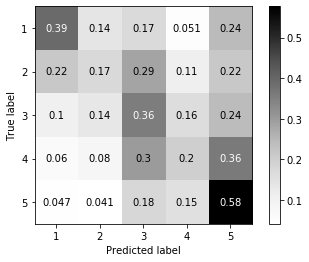

In [22]:
common.display_classifier_performance(classifier, test_as_vec, test_targets)

In [23]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=10, learning_rate=1)
classifier.fit(train_as_vec, train_targets)
classifier.score(test_as_vec, test_targets)

0.5458257927082155

SCORE: 0.27254614272317623
[[0.22250501 0.01966682 0.05498997 0.07847447 0.62436372]
 [0.09809767 0.02565209 0.06130614 0.147323   0.6676211 ]
 [0.03627538 0.00980684 0.04570579 0.19021298 0.71799901]
 [0.01371103 0.00391149 0.02197093 0.1461192  0.81428735]
 [0.00693208 0.0018247  0.00867725 0.05981735 0.92274862]]


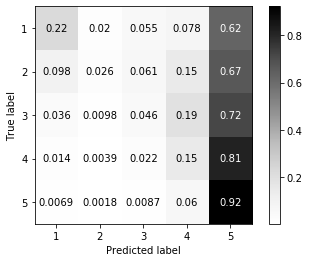

In [25]:
common.display_classifier_performance(classifier, test_as_vec, test_targets)